In [1]:
# Import Library
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
# Convert Datasets into DataFrame
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

<h1>Data Preprocessing</h1>

In [3]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<h1>HANDLE MISSING VALUE</h1>

In [4]:
df = df.dropna()
print('Total data setelah handle Missing Value:', len(df))

Total data setelah handle Missing Value: 2216


In [5]:
# Mencari Daftar Pelanggan Terbaru 

df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("Tanggal Pendaftaran Pelanggan Terbaru:",max(dates))
print("Tanggal Pendaftaran Pelanggan Pertama:",min(dates))

Tanggal Pendaftaran Pelanggan Terbaru: 2014-12-06
Tanggal Pendaftaran Pelanggan Pertama: 2012-01-08


<h1>Feature Engineering</h1>

In [6]:
# Menambah fitur num_days dari jumlah hari pelanggan mulai berbelanja di toko terhadap tanggal terakhir pendaftar yang tercatat

days = []
maxDate = max(dates)
for i in dates:
  total = maxDate - i
  days.append(total)

df['num_days'] = days
df['num_days'] = pd.to_numeric(df['num_days'], errors="coerce")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [8]:
# Explore Data kategorik

print('Data fitur Education:\n',df['Education'].value_counts(), '\n')
print('Data fitur Marital Status\n',df['Marital_Status'].value_counts(), '\n')

Data fitur Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64 

Data fitur Marital Status
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 



In [9]:
# Menambah fitur age untuk setiap customer
df['age'] = 2023 - df['Year_Birth']

# Menambah fitur spent yang merupakan informasi total pengeluaran customer terhadap setiap item yang ada di toko
df['spent'] = df['MntWines'] + df['MntSweetProducts'] + df['MntMeatProducts'] + df['MntGoldProds'] + df['MntFruits'] + df['MntFishProducts']

# Menambah fitur living_with untuk menggambarkan Marital Status
df['living_with'] = df['Marital_Status'].replace({
                                                   'Married': 'Partner',
                                                   'Together': 'Partner',
                                                   'Single': 'Alone',
                                                   'Divorced': 'Alone',
                                                   'Widow': 'Alone',
                                                   'Absurd': 'Alone',
                                                   'YOLO': 'Alone',
                                                  }) 

# Menambah fitur children untuk menggambarkan total anak yang ada di dalam rumah
df['children'] = df['Kidhome'] + df['Teenhome']

# Menambah fitur fam_size untuk menggambarkan jumlah anggota keluarga yang ada di dalam rumah
df['fam_size'] = df['living_with'].replace({'Alone': 1, 'Partner': 2}) + df['children']

# Menambah fitur is_parent untuk menggambarkan seorang customer merupakan orang tua atau bukan
df['is_parent'] = np.where(df.children > 0, 1, 0)

# Segmentasi fitur Education menjadi 3 grup
df['Education'] = df['Education'].replace({
                                            'Graduation': 'Graduate',
                                            'PhD': 'PostGraduate',
                                            'Master': 'PostGraduate',
                                            '2n Cycle': 'UnderGraduate',
                                            'Basic': 'UnderGraduate',
                                          })

# Merubah nama beberapa fitur
df = df.rename(columns={
                          'MntWines': 'Wines',
                          'MntSweetProducts': 'Sweets',
                          'MntMeatProducts': 'Meat',
                          'MntGoldProds': 'Gold',
                          'MntFruits': 'Fruits',
                          'MntFishProducts': 'Fish',
                       })

# Menghapus beberapa fitur yang tidak digunakan
drop_column = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(drop_column, axis=1)

In [10]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   Wines                2216 non-null   int64  
 6   Fruits               2216 non-null   int64  
 7   Meat                 2216 non-null   int64  
 8   Fish                 2216 non-null   int64  
 9   Sweets               2216 non-null   int64  
 10  Gold                 2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0      Graduate  58138.0        0         0       58    635      88   546   
1      Graduate  46344.0        1         1       38     11       1     6   
2      Graduate  71613.0        0         0       26    426      49   127   
3      Graduate  26646.0        1         0       26     11       4    20   
4  PostGraduate  58293.0        1         0       94    173      43   118   

   Fish  Sweets  ...  AcceptedCmp2  Complain  Response           num_days  \
0   172      88  ...             0         0         1  83894400000000000   
1     2       1  ...             0         0         0  10800000000000000   
2   111      21  ...             0         0         0  40780800000000000   
3    10       3  ...             0         0         0   5616000000000000   
4    46      27  ...             0         0         0  27734400000000000   

   age  spent  living_with  children  fam_size  is_parent  
0   66   1617        Alone         0         1          0  
1   69     27        Alone         2         3          1  
2   58    776      Partner         0         2          0  
3   39     53      Partner         1         3          1  
4   42    422      Partner         1         3          1  

[5 rows x 30 columns]

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

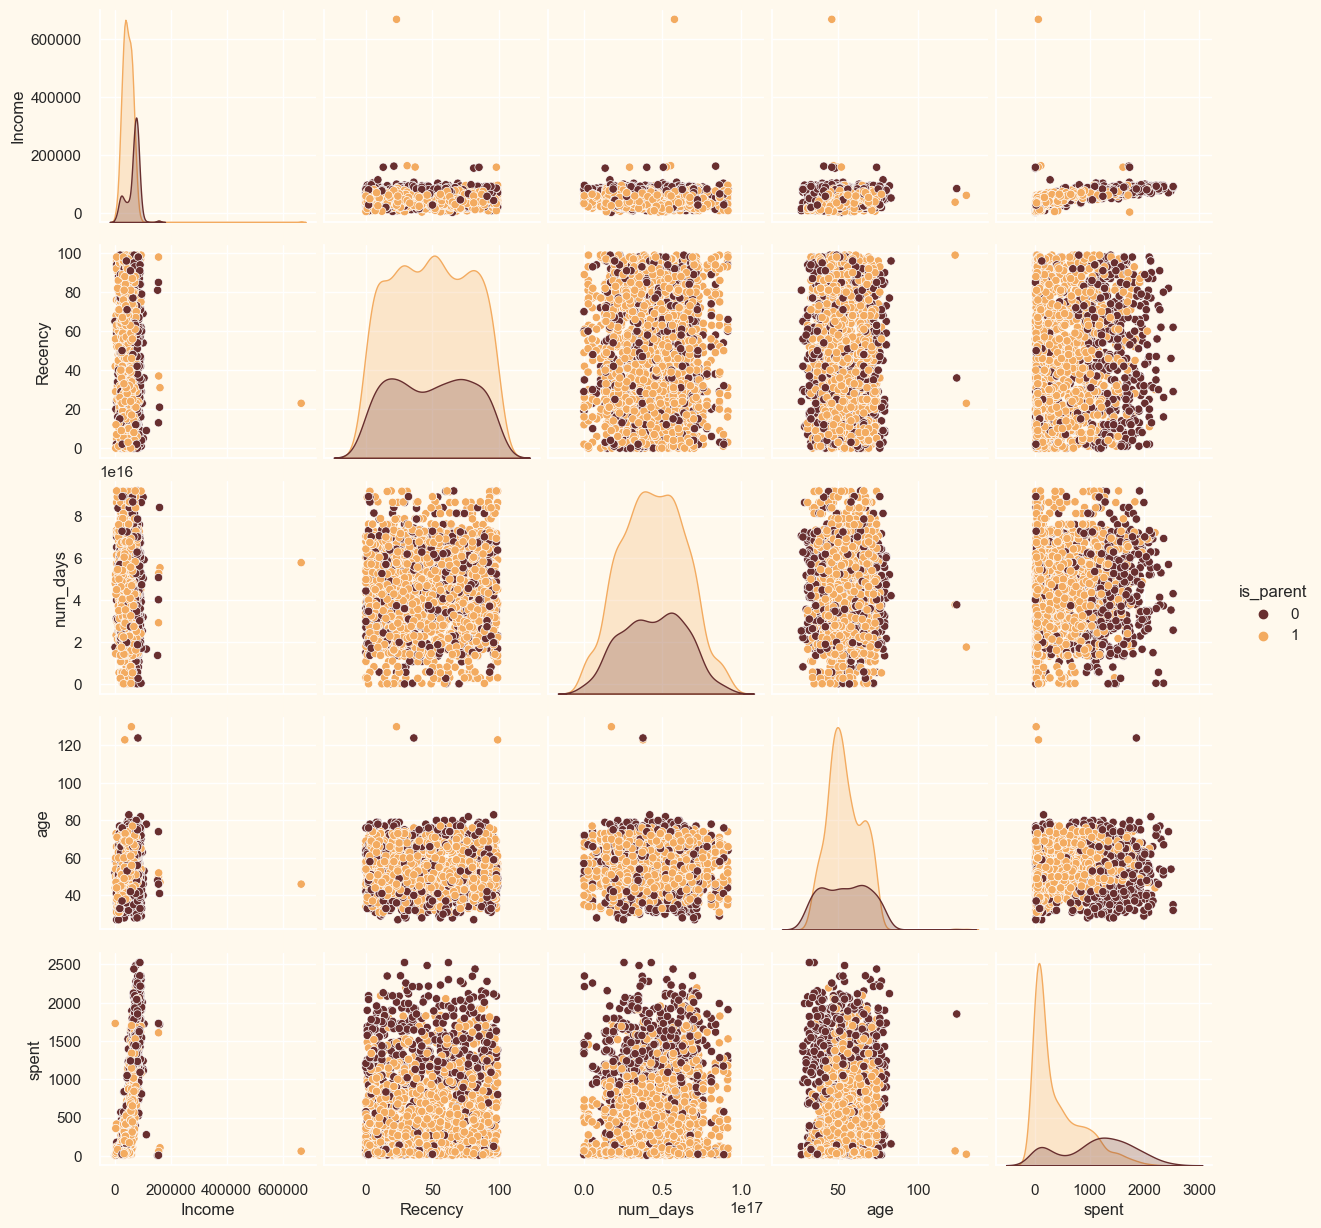

In [11]:
# Create plot dari beberapa fitur

sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

To_Plot = [ "Income", "Recency", "num_days", "age", "spent", "is_parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "is_parent",palette= (["#682F2F","#F3AB60"]))

plt.show()

<h1>OUTLIER REMOVAL</h1>

In [12]:
df = df[(df['age'] < 90)]
df = df[(df['Income'] < 600000)]

print('Total Data setelah dilakukan prose Outlier Removal:', len(df))

Total Data setelah dilakukan prose Outlier Removal: 2212


<h1>Plot setelah dilakukan proses Outlier Removal</h1>

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

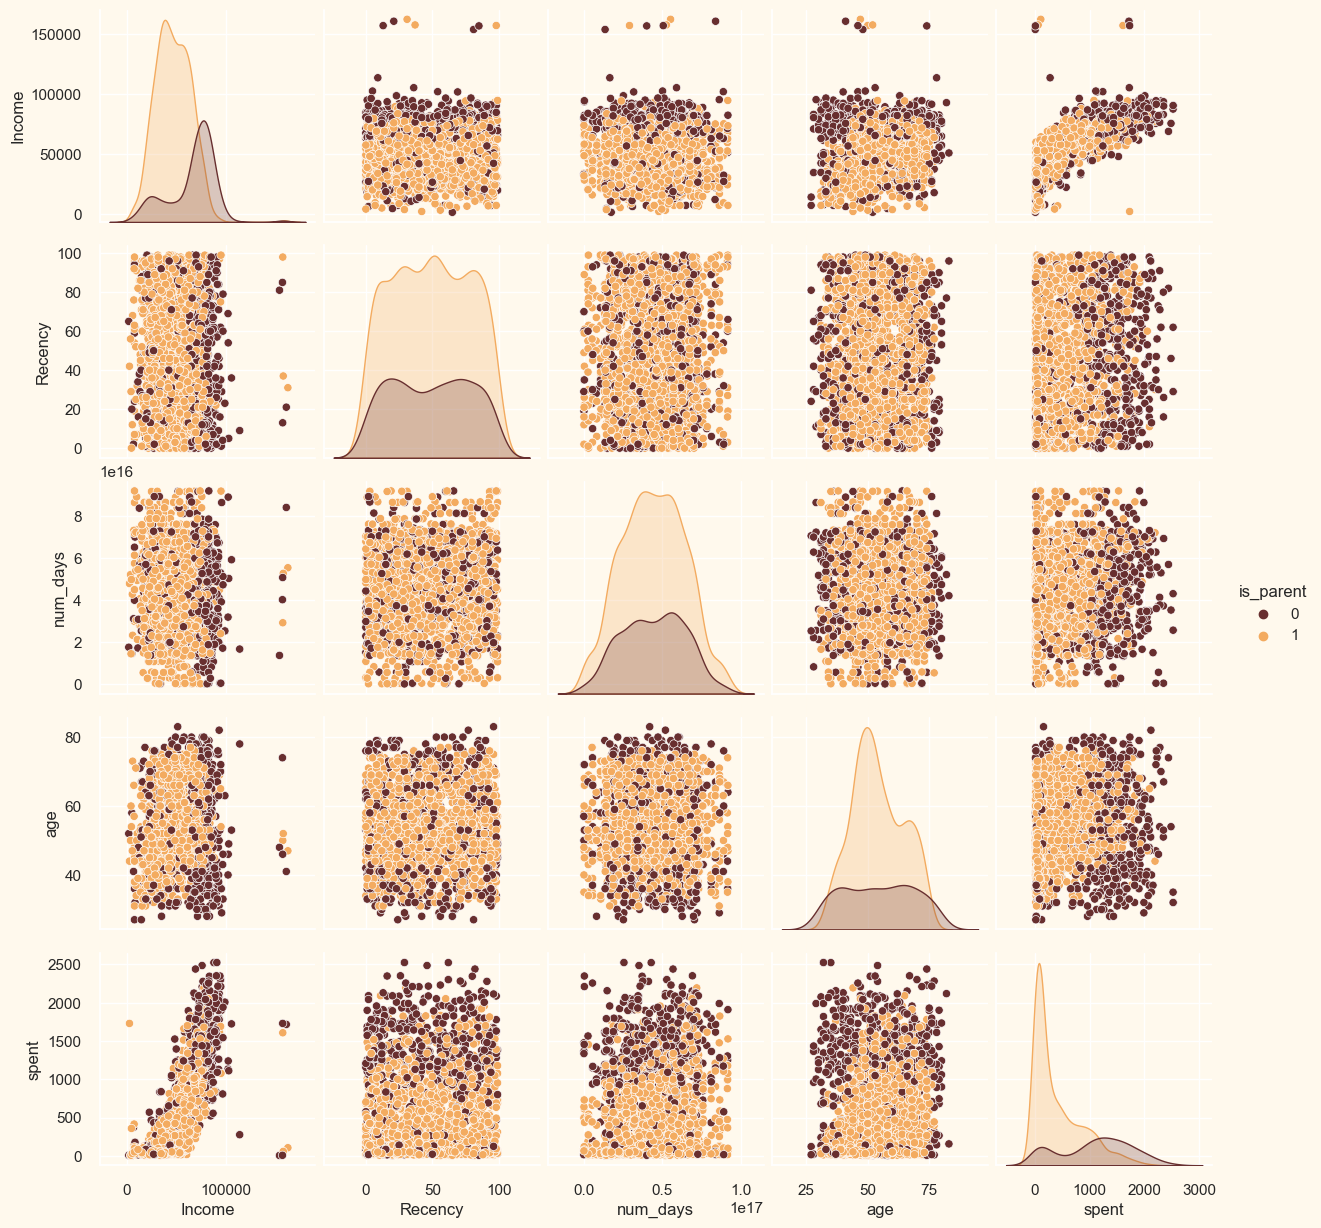

In [13]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

To_Plot = [ "Income", "Recency", "num_days", "age", "spent", "is_parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "is_parent",palette= (["#682F2F","#F3AB60"]))

plt.show()

In [14]:
# Convert Data kategorik menjadi numerik

k = (df.dtypes == 'object')
object_cols = list(k[k].index)

LE = LabelEncoder()
for i in object_cols:
  df[i] = df[[i]].apply(LE.fit_transform)

In [15]:
# Data setelah di lakukan proses label encoding
df.head(5)

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  Fish  \
0          0  58138.0        0         0       58    635      88   546   172   
1          0  46344.0        1         1       38     11       1     6     2   
2          0  71613.0        0         0       26    426      49   127   111   
3          0  26646.0        1         0       26     11       4    20    10   
4          1  58293.0        1         0       94    173      43   118    46   

   Sweets  ...  AcceptedCmp2  Complain  Response           num_days  age  \
0      88  ...             0         0         1  83894400000000000   66   
1       1  ...             0         0         0  10800000000000000   69   
2      21  ...             0         0         0  40780800000000000   58   
3       3  ...             0         0         0   5616000000000000   39   
4      27  ...             0         0         0  27734400000000000   42   

   spent  living_with  children  fam_size  is_parent  
0   1617            0         0         1          0  
1     27            0         2         3          1  
2    776            1         0         2          0  
3     53            1         1         3          1  
4    422            1         1         3          1  

[5 rows x 30 columns]

In [16]:
df_copy = df.copy()
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']

df_copy = df_copy.drop(cols_del, axis=1)

# Standarization
scaler = StandardScaler()
scaler.fit(df_copy)
df_scale = pd.DataFrame(scaler.transform(df_copy), columns=df_copy.columns)

In [17]:
print('Hasil Datasets yang telah di standarisasi')
df_scale.head()

Hasil Datasets yang telah di standarisasi


Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690293  2.453472  1.483713  ...             2.503607          -0.555814   
1 -0.718230 -0.651004 -0.634019  ...            -0.571340          -1.171160   
2 -0.178542  1.339513 -0.147184  ...            -0.229679           1.290224   
3 -0.655787 -0.504911 -0.585335  ...            -0.913000          -0.555814   
4 -0.218684  0.152508 -0.001133  ...             0.111982           0.059532   

   NumWebVisitsMonth  num_days       age     spent  living_with  children  \
0           0.692181  1.973583  1.018352  1.676245    -1.349603 -1.264598   
1          -0.132545 -1.665144  1.274785 -0.963297    -1.349603  1.404572   
2          -0.544908 -0.172664  0.334530  0.280110     0.740959 -1.264598   
3           0.279818 -1.923210 -1.289547 -0.920135     0.740959  0.069987   
4          -0.132545 -0.822130 -1.033114 -0.307562     0.740959  0.069987   

   fam_size  is_parent  
0 -1.758359  -1.581139  
1  0.449070   0.632456  
2 -0.654644  -1.581139  
3  0.449070   0.632456  
4  0.449070   0.632456  

[5 rows x 23 columns]

# Pengurangan Dimensi menggunakan PCA

In [18]:
#Mengurangi dimensi menjadi 3
pca = PCA(n_components=3)
pca.fit(df_scale)
df_pca = pd.DataFrame(pca.transform(df_scale), columns=(["col1","col2", "col3"]))
df_pca.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0  1.284887e-16  2.878377 -5.969394 -2.538494 -0.780421  2.383290   
col2  2212.0  3.212219e-17  1.706839 -4.312196 -1.328316 -0.158123  1.242289   
col3  2212.0  3.854662e-17  1.221956 -3.530416 -0.829067 -0.022692  0.799895   

           max  
col1  7.444305  
col2  6.142721  
col3  6.611222

# Menentukan jumlah cluster yang paling optimal

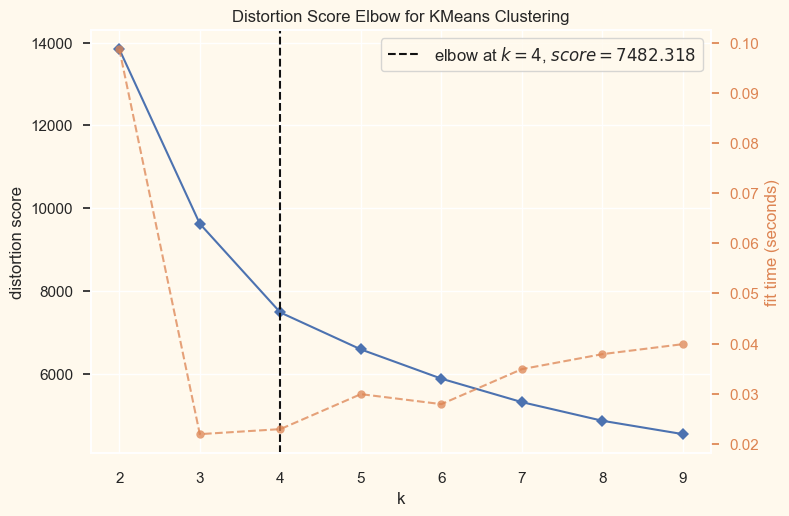

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9), k=(2, 10))

In [19]:
kelbow_visualizer(KMeans(), df_pca, k=(2,10), metric='distortion')

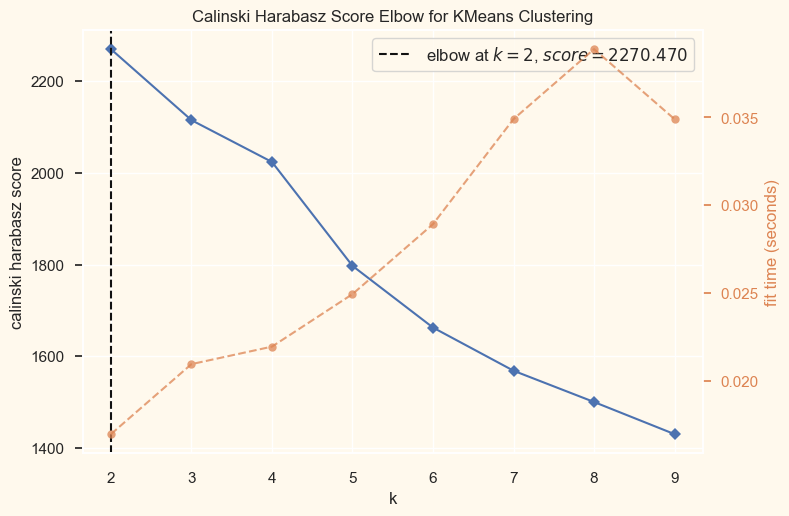

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>,
                 estimator=KMeans(n_clusters=9), k=(2, 10),
                 metric='calinski_harabasz')

In [20]:
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(), df_pca, k=(2,10), metric='calinski_harabasz')

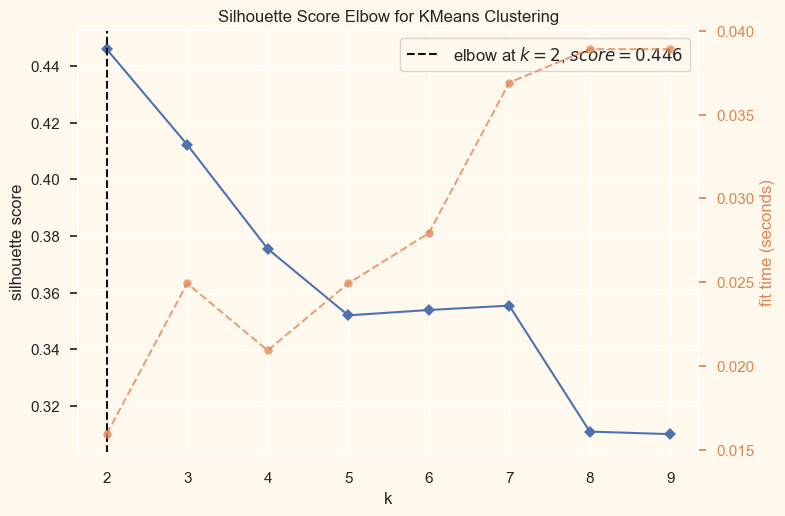

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>,
                 estimator=KMeans(n_clusters=9), k=(2, 10),
                 metric='silhouette')

In [21]:
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(), df_pca, k=(2,10), metric='silhouette')

Dari hasil pencarian jumlah cluster yang paling optimal dari ketiga metode di atas menunjukkan bahwa: <br>
metode distortion score menunjukkan bahwa jumlah kelas yang paling optimal adalah 4 cluster sedangkan, <br> 
metode calinski_harabasz dan silhouette menunjukkan bahwa jumlah cluster yang paling optimal adalah 2 cluster.

# Modeling dengan Algoritma K-Means menggunakan 2 Cluster

In [22]:
k2 = KMeans(n_clusters=2, random_state=9)

k2.fit(df_pca)
df_pca['cluster'] = k2.labels_
df['cluster'] = k2.labels_

df_pca

col1      col2      col3  cluster
0     4.994347 -0.151236  2.648081        1
1    -2.884455 -0.006671 -1.863867        0
2     2.617864 -0.720757 -0.252088        1
3    -2.676036 -1.541970 -0.922537        0
4    -0.649591  0.209831 -0.021196        0
...        ...       ...       ...      ...
2207  2.321341  2.436323  0.520721        1
2208 -3.105957  4.020986 -1.499033        0
2209  2.673666 -1.869183  0.592662        1
2210  1.494055  1.701859 -1.626902        1
2211 -2.742613  1.650313 -0.283786        0

[2212 rows x 4 columns]

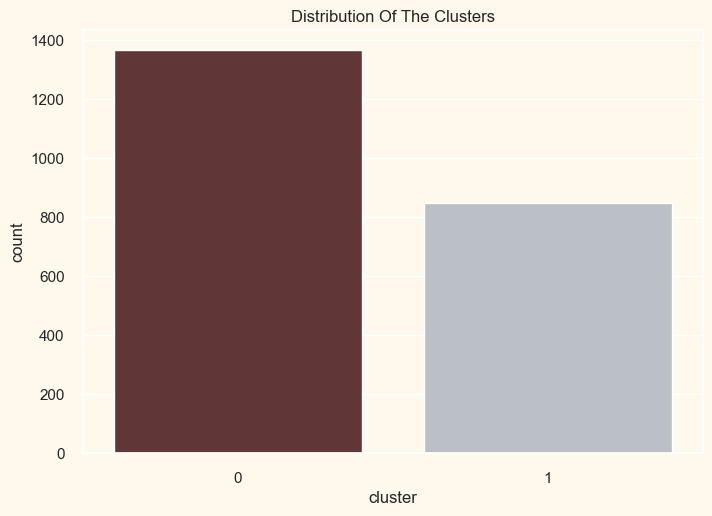

In [23]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9"]
pl = sns.countplot(x=df["cluster"], palette = pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

# Sebaran data spent dan income hasil clustering

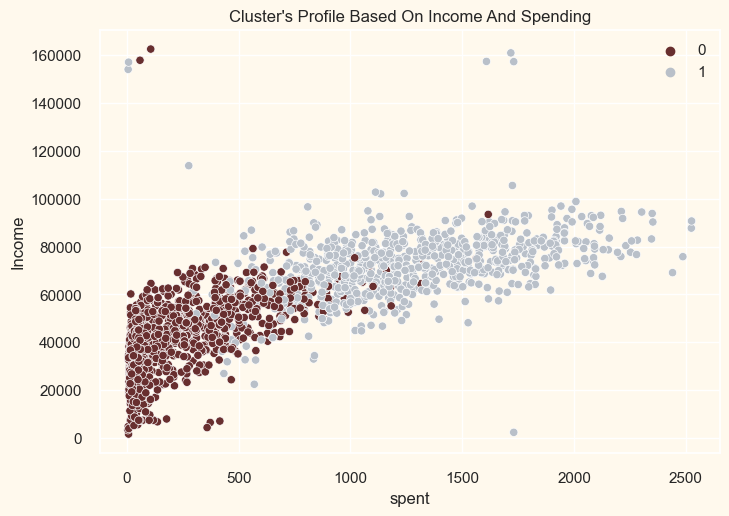

In [24]:
pl = sns.scatterplot(data = df_pca,x=df['spent'], y=df["Income"],hue=df["cluster"], palette = pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Hasil Visualisasi dari income dan spent berdasarkan cluster yang telah dibangun menunjukkan bahwa cluster 0 memiliki pendapatan rendah serta menghabiskan dana untuk belanja yang tidak begitu besar dan cluster 1 memiliki pendapatan yang tinggi serta menghabiskan dana untuk belanja yang besar.

# Visualisasi Data Spent dari setiap cluster

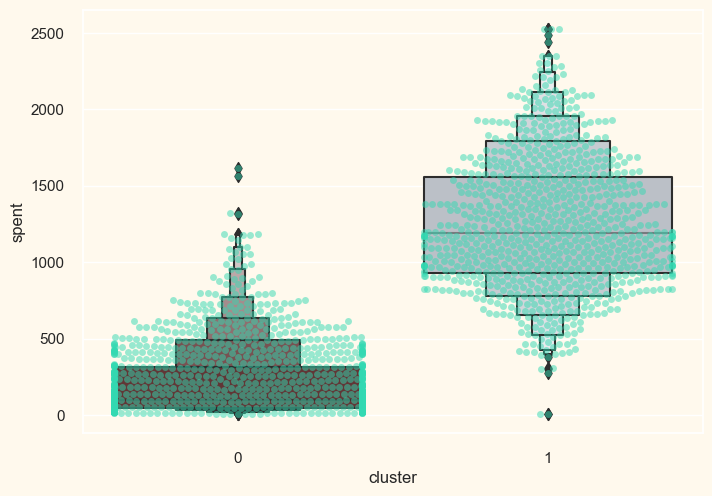

In [25]:
plt.figure()
pl=sns.swarmplot(x=df["cluster"], y=df["spent"], color= '#33d9b2', alpha=0.5 )
pl=sns.boxenplot(x=df["cluster"], y=df["spent"], palette = pal)
plt.show()

Hasil visualisasi diatas menunjukkan bahwa cluster 1 lebih banyak mengeluarkan uang untuk berbelanja dibandingkan cluster 1

# Performa Promosi

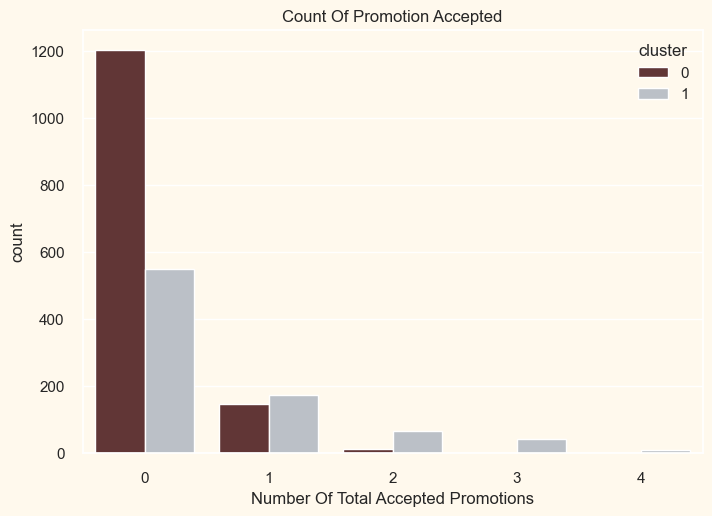

In [26]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["cluster"], palette=pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

dilihat dari visualisasi diatas, promosi yang dilakukan tidak terlalu berhasil jika dilihat secara keseluruhan karena masih terlalu sedikit peserta dari promosi yang dilakukan.

# Jumlah Pembelian

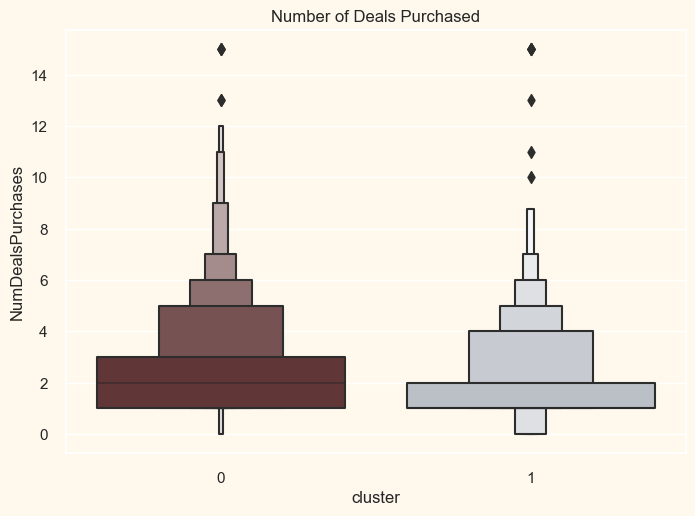

In [27]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["cluster"], palette=pal)
pl.set_title("Number of Deals Purchased")
plt.show()

jika dilihat dari jumlah pembelian yang dilakukan, cluster 0 lebih banyak melakukan pembelian jika dibanding cluster 1

# Profile Customer

<Figure size 800x550 with 0 Axes>

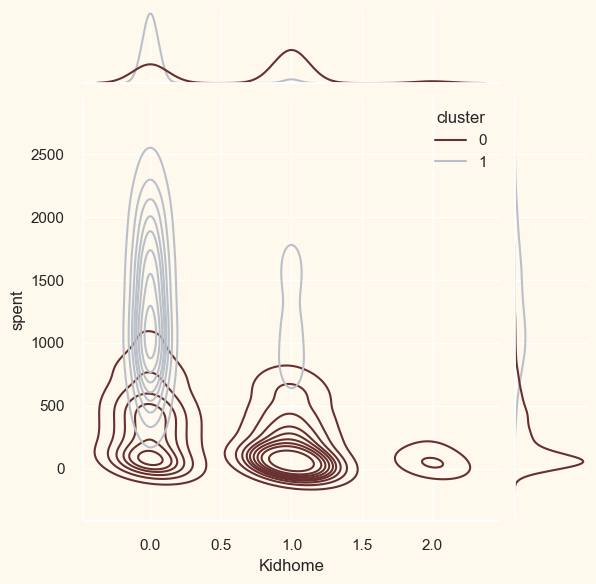

<Figure size 800x550 with 0 Axes>

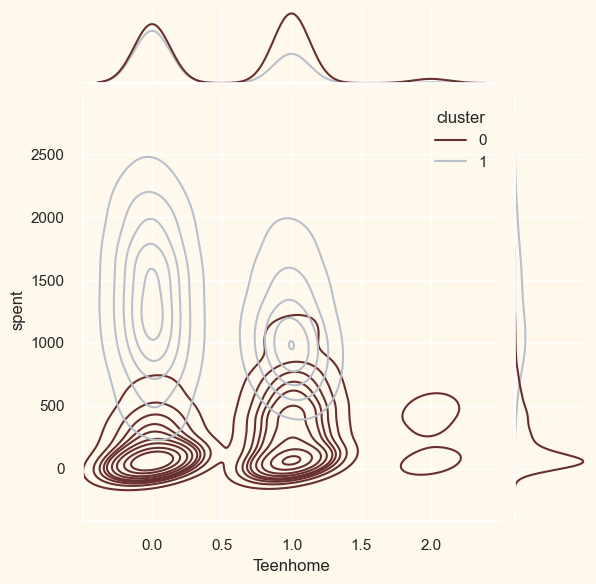

<Figure size 800x550 with 0 Axes>

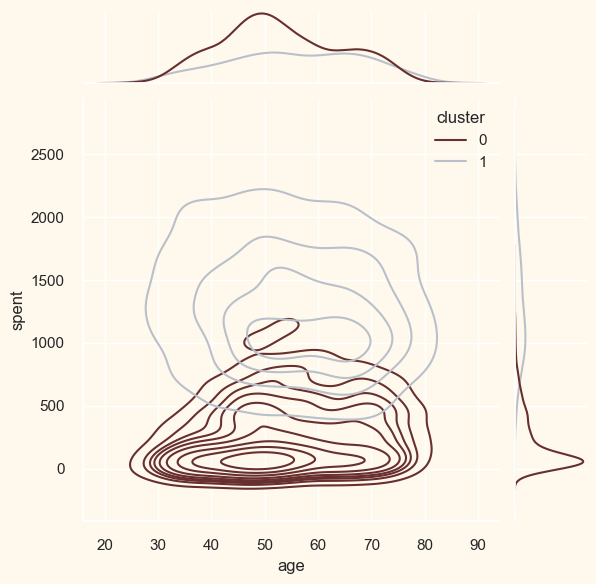

<Figure size 800x550 with 0 Axes>

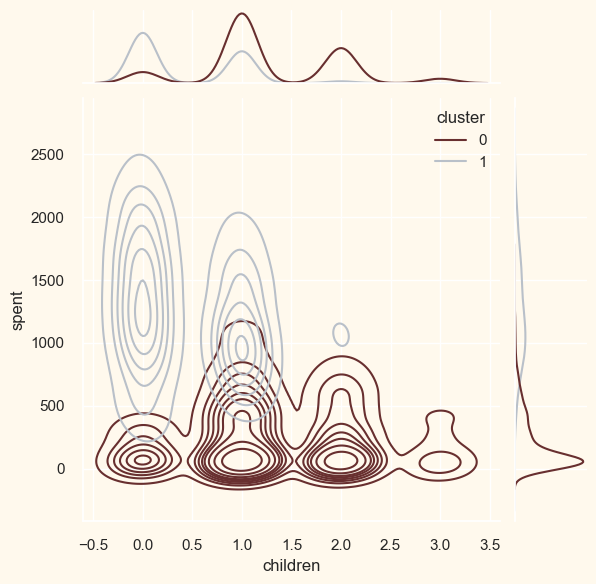

<Figure size 800x550 with 0 Axes>

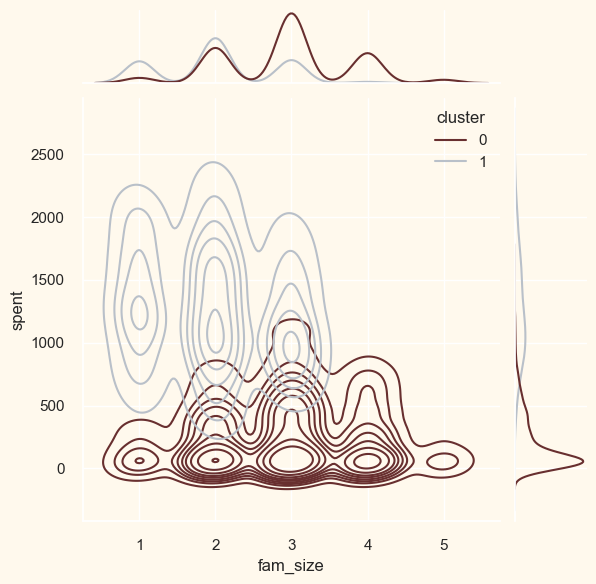

<Figure size 800x550 with 0 Axes>

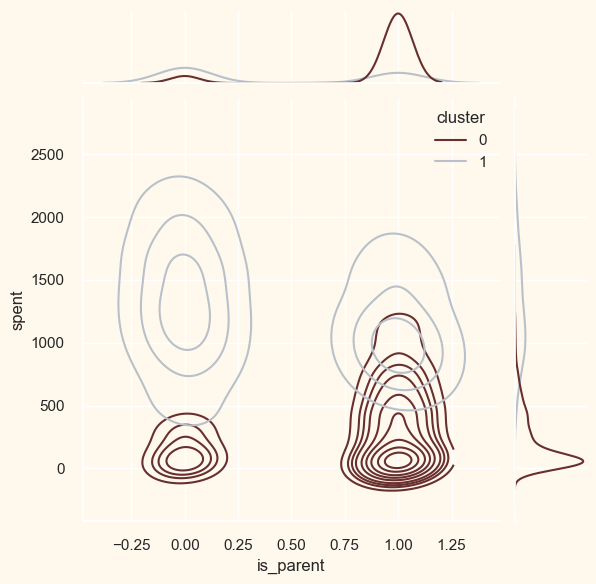

<Figure size 800x550 with 0 Axes>

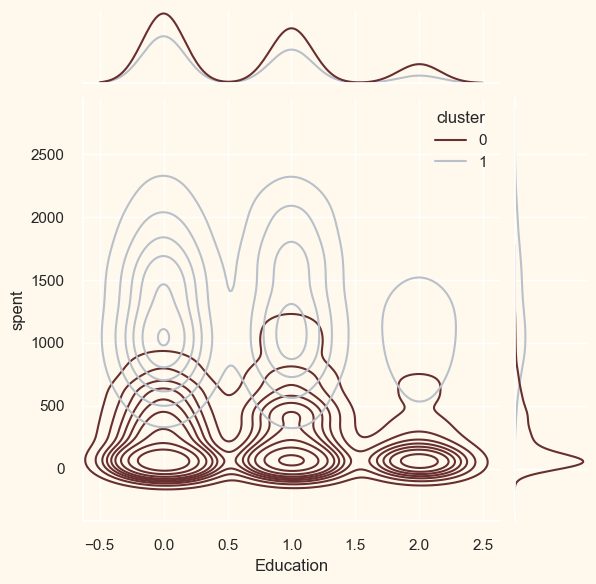

<Figure size 800x550 with 0 Axes>

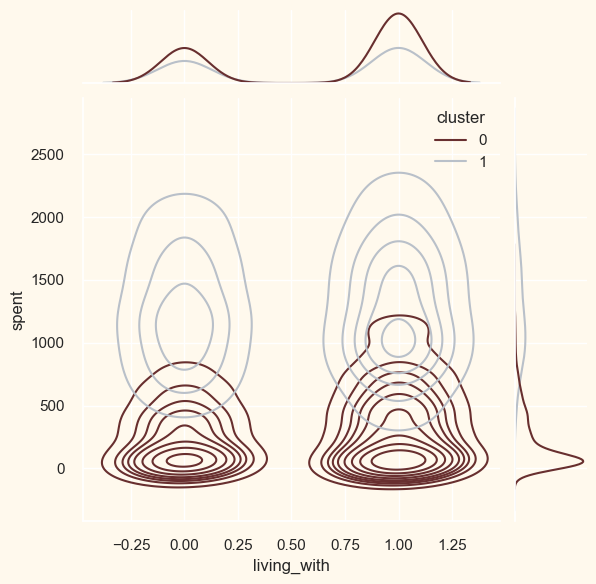

In [28]:
Personal = [ "Kidhome","Teenhome","age", "children", "fam_size", "is_parent", "Education","living_with"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["spent"], hue =df["cluster"], kind="kde", palette=pal)
    plt.show()

<h1>KESIMPULAN</h1>
Hasil clustering yang dilakukan menggunakan 2 cluster dengan algoritma K-Means 
menghasilkan :

1.  Cluster 1 adalah customer yang mengeluarkan uang untuk membeli produk lebih banyak dibanding cluster 0 dengan profile mayoritas customer telah menikah, tidak memiliki anak kecil dirumah, memiliki anak yang telah remaja. Memiliki besar keluarga paling banyak 3 anggota keluarga (1 pasangan dan 1 orang anak).
2.   Cluster 0 adalah customer yang tidak terlalu banyak mengeluarkan uang untuk membeli produk, telah menikah dan memiliki anak kecil ataupun anak yang telah remaja dirumahnya. Memiliki besar keluarga paling banyak 5 anggota keluarga ( 1 pasangan dan 3 orang anak baik remaja ataupun anak kecil).

Sehingga toko bahan makanan dapat mempertimbangkan karakteristik pelanggan seperti yang sudah dijelaskan agar dapat menghasilkan profit yang lebih tinggi dan dapat mempromosikan produk ke pelanggan secara akurat.